<a href="https://colab.research.google.com/github/TeinkBR/Simulation-Physics-Course/blob/main/Simulation_Physics_Work_sheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2.1 Simulating a cannon ball

In this exercise, you will simulate the trajectory of a cannonball in $2 \mathrm{D}$ until it hits the ground. In order to do so you have to solve Newton's equations of motion:
$$
\begin{aligned}
\frac{\mathrm{d} \mathbf{x}(t)}{\mathrm{d} t} &=\mathbf{v}(t) \\
\frac{\mathrm{d} \mathbf{v}(t)}{\mathrm{d} t} &=\frac{\mathbf{F}(t)}{m}
\end{aligned}
$$
where $\mathrm{x}(t)$ is the position as a function of time $t, m$ is the mass and $\mathbf{F}(t)$ is the force as a function of time.

At time $t=0$, the cannonball (mass $m=2.0 \mathrm{~kg}$ ) has a position of $\mathbf{x}(0)=0$ and a velocity of $\mathbf{v}(0)=(50,50)^{\top} \mathrm{m} \mathrm{s}^{-1}$.

To simulate the cannonball, you will use the simple Euler scheme to propagate the position $\mathrm{x}(t)$ and velocity $\mathrm{v}(t)$ at time $t$ to the time $t+\Delta t(\Delta t=0.1 \mathrm{~s})$ :
$$
\begin{aligned}
&\mathrm{x}(t+\Delta t)=\mathrm{x}(t)+\mathrm{v}(t) \Delta t \\
&\mathrm{v}(t+\Delta t)=\mathrm{v}(t)+\frac{\mathrm{F}(t)}{m} \Delta t
\end{aligned}
$$


$$
y^{\prime}(t)=f(t, y(t)), \quad y\left(t_0\right)=y_0 .
$$
Choose a value $h$ for the size of every step and set $t_n=t_0+n h$. Now, one step of the Euler method from $t_n$ to $t_{n+1}=t_n+h$ is: ${ }^{[3]}$
$$
y_{n+1}=y_n+h f\left(t_n, y_n\right)
$$

In [1]:
## important import
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from pylab import plot, show, xlabel, ylabel
import seaborn as sns
from matplotlib import animation
plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
# Model parameters
mass_cannon_ball = 1.0          # mass of cannon ball
g = 9.8          # Acceleration due to gravity (m/s^2)
r_init=10
v_init=50
t_init=0
t_end=100
angle=30
F_friction = 0 # force of resistance 
time_step = 1e-1         # time step in seconds(s)

In [4]:
# Use Euler method to update variables
def euler_method(r_init,v_init,t_init,t_end,F_friction,angle,time_step):
  x_init=r_init*np.cos(angle/180*np.pi)    ## convert to radian
  y_init=r_init*np.sin(angle/180*np.pi)
  v_x_init=v_init*np.cos(angle/180*np.pi)
  v_y_init=v_init*np.sin(angle/180*np.pi)

  v_x=[v_x_init]
  v_y=[v_y_init]
  x=[x_init]
  y=[y_init]
  time_range=np.arange(t_init,t_end,time_step)
  ax = [-(F_friction*np.cos(angle/180*np.pi))/mass_cannon_ball]        
  ay = [-g-(F_friction*np.sin(angle/180*np.pi)/mass_cannon_ball)]

  print('t range shape',np.shape(time_range))
  for t_index,t in enumerate(time_range):
       
    v_x.append(v_x[t_index]+time_step*ax[t_index])                                       ## velocity change on x dirextion
    v_y.append(v_y[t_index]+time_step*ay[t_index])                                       ## velocity change on y direction
    x.append(x[t_index]+time_step*v_x[t_index])                                          ## displacement on x direction
    y.append(y[t_index]+time_step*v_y[t_index])                                          ## displacement on y direction
    ax.append(-(F_friction*np.cos(angle/180*np.pi))/mass_cannon_ball)     ## accelaration on x direction
    ay.append(-g-(F_friction*np.sin(angle/180*np.pi)/mass_cannon_ball))   ## accelaration on y direction          
    
    # Print the values to check
   # t_index=t_index+1
  print ("t=", t_index)
  print ("vx=", v_x)

  return x,y,v_x,v_y,time_range


In [ ]:
x,y,v_x,v_y,t=euler_method(r_init, v_init, t_init, t_end,F_friction, angle, time_step)

t range shape (1000,)
t= 999
vx= [43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.3012701892219

Text(0.5, 0, 'time (s)')

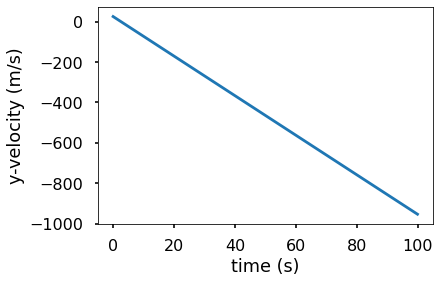

In [ ]:
plt.plot(t,v_y[0:-1])
plt.ylabel("y-velocity (m/s)")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

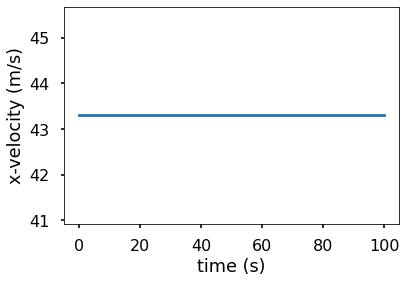

In [ ]:
plt.plot(t,v_x[0:-1])
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")

Text(0.5, 0, 'x-velocity (m/s)')

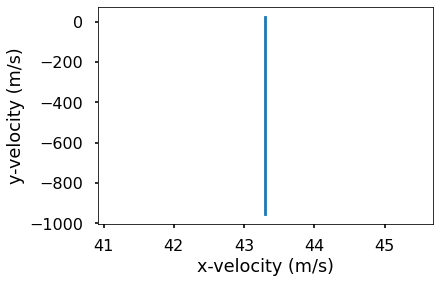

In [ ]:
plt.plot(v_x,v_y)
plt.ylabel("y-velocity (m/s)")
plt.xlabel("x-velocity (m/s)")

Text(0.5, 0, 'x (m)')

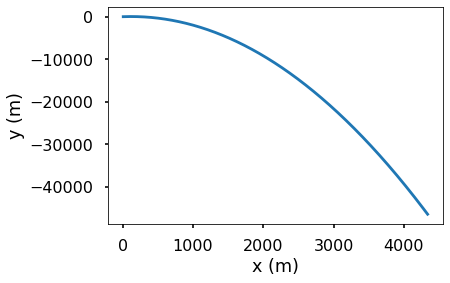

In [ ]:
plt.plot(x,y,'-')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

# 3.1 Simulating the solar system with the Euler scheme



The behavior of the solar system is governed by the gravitational force between any two "particles":
$$
\mathbf{F}_{i j}=-G m_i m_j \frac{\mathbf{r}_{i j}}{\left|\mathbf{r}_{i j}\right|^3}
$$
where $\mathbf{r}_{i j}=\mathbf{x}_i-\mathbf{x}_j$ is the distance between particle $i$ and $j, G$ is the gravitational constant, and $m_i$ is the mass of particle $i$. The total force on any single particle is:
$$
\mathbf{F}_i=\sum_{\substack{j=0 \\ i \neq j}}^N \mathbf{F}_{i j}
$$

In [9]:
# Code for simulate orbit article
#%% Generate data
G           = 6.67e-11                  # constant G
M_sun          = 2.0e30                 # mass of sun
M_earth     = 5.972e29                  # mass of earth  
M_moon      = 5.1e8                     # mass of the moon

AU          = 1.5e11                    # earth sun distance
Earth_moon_distance = 3.844e8           # earth moon distance

daysec      = 24.0*60*60                # seconds of a day
e_ap_v      = 29290                     # earth velocity at aphelion

## gravitational constant between earth and sun, between earth and moon
gravconst_earth_sun = G*M_earth*M_sun
gravconst_earth_moon = G*M_earth*M_moon
## initial position of sun, moon and earth in the frame
x_init_sun,y_init_sun = 0,0
x_init_earth,y_init_earth = AU,0
x_init_moon,y_init_moon =AU-Earth_moon_distance,0

t_init           = 0.0
t_end = 10*daysec
time_step          = 1

In [10]:
# start simulation
def euler_method_solar(x_init_earth,y_init_earth,x_init_sun,y_init_sun,x_init_moon,y_init_moon,t_init,t_end,time_step):
  # initialize time range of the earth sun, moon relative motion
  t_range=np.arange(t_init,t_end,time_step)
  # intialize earth, sun, moon position
  x_earth,y_earth= [x_init_earth,y_init_earth]
  x_moon,y_moon= [x_init_moon,y_init_moon]
  x_sun,y_sun= [x_init_sun,y_init_sun]

  # initalize earth and moon velocity
  xv_earth,yv_earth= 0,0
  xv_moon,yv_moon = 0,0

  
  plt.figure(figsize=(6,8))
  plt.plot(x_earth,y_earth,label='earth location')
  plt.plot(x_moon,y_moon,label='moon location')
  plt.plot(x_sun,y_sun,label='sun location')

  plt.show()
  # displacement of earth according to sun, have to be updated simultaneously

  earth_rx,earth_ry = x_init_earth - x_init_sun,  y_init_earth - y_init_sun

  # displacement of moon according to earth, have to be updated simultaneously 
  moon_rx,moon_ry = x_init_moon - x_init_earth,  y_init_moon - y_init_earth
  
  modr3_earth = (earth_rx**2+earth_ry**2)**1.5
  modr3_moon = (moon_rx**2+moon_ry**2)**1.5

  # initialize gravitation force betwwen earth and sun
  fx_earth = -gravconst_earth_sun*earth_rx/modr3_earth
  fy_earth = -gravconst_earth_sun*earth_ry/modr3_earth
  # intialize gravitation force between earth and moon
  fx_moon = -gravconst_earth_moon*moon_rx/modr3_moon
  fy_moon = -gravconst_earth_moon*moon_ry/modr3_moon

   
  ## initialize accelartion of earth
  ax_earth=fx_earth/M_earth

  ay_earth=fy_earth/M_earth
  ## intialize accelartion of moon
  ax_moon = fx_moon/M_moon
    
  ay_moon = fy_moon/M_moon
  
  v_x_init_earth,v_y_init_earth= 0,0

  v_x_init_moon,v_y_init_moon = 0,0

  v_x_earth_list,v_y_earth_list =[],[]

  v_x_moon_list, v_y_moon_list=[],[]
  
  x_moon_list, y_moon_list=[],[]
  
  x_earth_list,y_earth_list =[],[]

  for t_index,t in enumerate(t_range):
    ### Now we update the velocity, accelartion, position of earth and moon (sun is stationary)
    
    ## update earth velocity   
    
    xv_earth =xv_earth+ fx_earth*time_step/M_earth
    
    yv_earth =yv_earth+ fx_earth*time_step/M_earth
    
    ## update moon velocity

    xv_moon =xv_moon+ fx_moon*time_step/M_moon
    yv_moon =yv_moon+ fx_moon*time_step/M_moon

    x_moon= x_moon+xv_moon*time_step
    y_moon= y_moon+yv_moon*time_step

    x_moon_list.append(x_moon)
    y_moon_list.append(y_moon)

    xv_earth =xv_earth+ fx_earth*time_step/M_earth
    yv_earth =yv_earth+ fx_earth*time_step/M_earth

    x_earth= x_earth+xv_earth*time_step
    y_earth= y_earth+yv_earth*time_step

    x_earth_list.append(x_earth)
    y_earth_list.append(y_earth)

    # update position
    x_init_earth += xv_earth*time_step
    y_init_earth += yv_earth*time_step 
    

    x_sun_list=np.zeros(len(x_earth_list))
    y_sun_list=np.zeros(len(y_earth_list))
  
    
 
    
  
    
 
 





  #fig, ax = plt.subplots(figsize=(10,10))
  plt.plot(x_earth_list,y_earth_list)
  plt.plot(x_moon_list,y_moon_list)
  plt.plot(x_sun_list,y_sun_list)

  
  plt.show()

  return  plt.show()

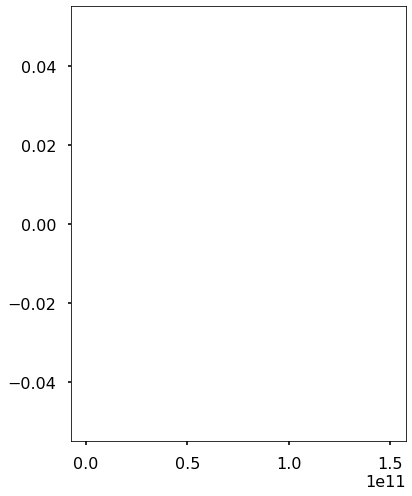

In [ ]:
euler_method_solar(x_init_earth, y_init_earth, x_init_sun, y_init_sun, x_init_moon, y_init_moon, t_init, t_end, time_step)